# Movies Recommendation System

## Business Understanding

In today's streaming industry, companies like Netflix, Hulu, and Amazon Prime Video face the challenge of providing users with relevant content that matches their preferences. With vast movie catalogs, it can be overwhelming for users to find films they enjoy, leading to lower engagement and subscription cancellations. 

The goal of this project is to build a recommendation system to solve this problem by suggesting movies users are likely to enjoy based on their past ratings. The model will leverage collaborative filtering techniques using the MovieLens dataset to recommend the top 5 movies to each user.

### Stakeholders

The primary stakeholders are:
- **Streaming platforms**: They benefit from increased user engagement and retention by offering personalized recommendations.
- **Users**: They receive tailored suggestions, improving their movie-watching experience.

### Objective

- Build a recommendation system that improves user engagement by providing relevant movie suggestions.

### Success Criteria

- Improve user satisfaction by recommending relevant movies with a model evaluated through RMSE and MAE.

## Data Understanding

### Data Source

The data for this project comes from the **MovieLens dataset**, a widely-used benchmark dataset provided by the GroupLens research group at the University of Minnesota. This dataset is designed specifically for building and testing recommendation systems, making it highly relevant for our project.

We are using the **MovieLens small dataset** (ml-latest-small), which contains:

- **Ratings**: User ratings for different movies.
- **Movies**: Information about movie titles and genres.
- **Tags**: User-generated tags for movies.
- **Links**: Metadata connecting movies to external resources like IMDb.

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data

In [10]:
# Load datasets
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')
links = pd.read_csv('ml-latest-small/links.csv')

# Display the first few rows of each dataset
print("Movies Data:\n")
movies.head()

Movies Data:



,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
print("\nRatings Data:\n")
ratings.head()


Ratings Data:



,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
print("\nTags Data:\n")
tags.head()


Tags Data:



,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [13]:
print("\nLinks Data:\n")
links.head()


Links Data:



,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


### Check Data Shapes and Info

In [17]:
# Data shapes
print("Movies Shape:", movies.shape)
print("Ratings Shape:", ratings.shape)
print("Tags Shape:", tags.shape)
print("Links Shape:", links.shape)
print("\n-----------------------------------------------\n")

# Get info on datasets
print("\nMovies Info:\n", movies.info())
print("\n-----------------------------------------------\n")
print("\nRatings Info:\n", ratings.info())
print("\n-----------------------------------------------\n")
print("\nTags Info:\n", tags.info())
print("\n-----------------------------------------------\n")
print("\nLinks Info:\n", links.info())
print("\n-----------------------------------------------\n")

Movies Shape: (9742, 3)
Ratings Shape: (100836, 4)
Tags Shape: (3683, 4)
Links Shape: (9742, 3)

-----------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB

Movies Info:
 None

-----------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

Ratings Info:
 None

-------------

### Descriptive Statistics

#### Ratings Descriptive Statistics

In [21]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


#### Movies Descriptive Statistics

In [20]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


### Handle Missing Values

In [26]:
def get_percentage_missing(dataframe):
    missing_values_series = dataframe.isna().sum()
    missing_values_indexes = list(missing_values_series.index)
    missing_values_values = list(missing_values_series.values)
    missing_values_percentage = pd.DataFrame({"indexes": missing_values_indexes, "values": missing_values_values, "percentage_missing": list(np.round(((np.array(missing_values_values) * 100) / len(dataframe)), 2))})
    missing_values_percentage.set_index("indexes", inplace=True)
    return missing_values_percentage

In [27]:
get_percentage_missing(movies)

,values,percentage_missing
indexes,,
movieId,0,0.0
title,0,0.0
genres,0,0.0


In [28]:
get_percentage_missing(ratings)

,values,percentage_missing
indexes,,
userId,0,0.0
movieId,0,0.0
rating,0,0.0
timestamp,0,0.0


In [29]:
get_percentage_missing(tags)

,values,percentage_missing
indexes,,
userId,0,0.0
movieId,0,0.0
tag,0,0.0
timestamp,0,0.0


In [30]:
get_percentage_missing(links)

,values,percentage_missing
indexes,,
movieId,0,0.00
imdbId,0,0.00
tmdbId,8,0.08


This dataset has very few missing values found in `links` dataframe that may be dropped, filled with other values or ignored altogether based on their importance in our research

### Data Visualization

#### Ratings Distribution

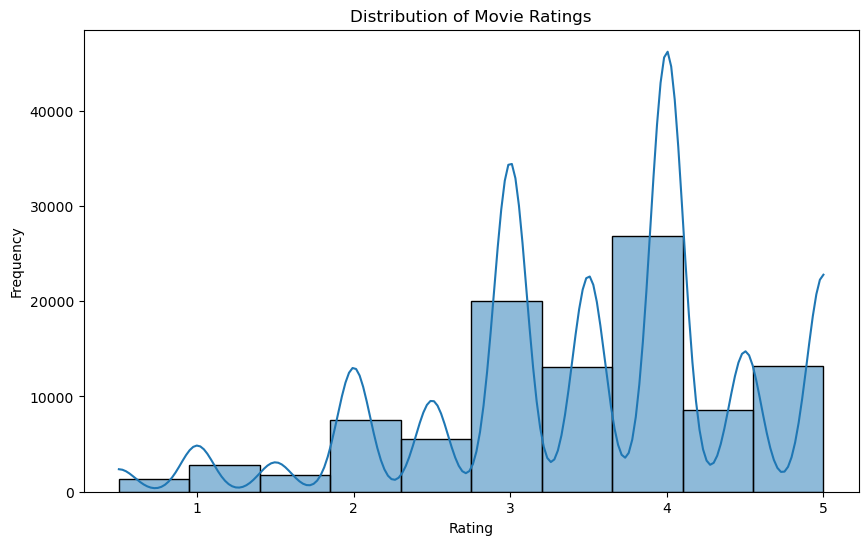

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The distribution of movie ratings shows a right-skewed pattern, with most ratings clustered around the higher end (4-5 stars), indicating that users generally rate movies positively.

#### Number of Ratings per Movie

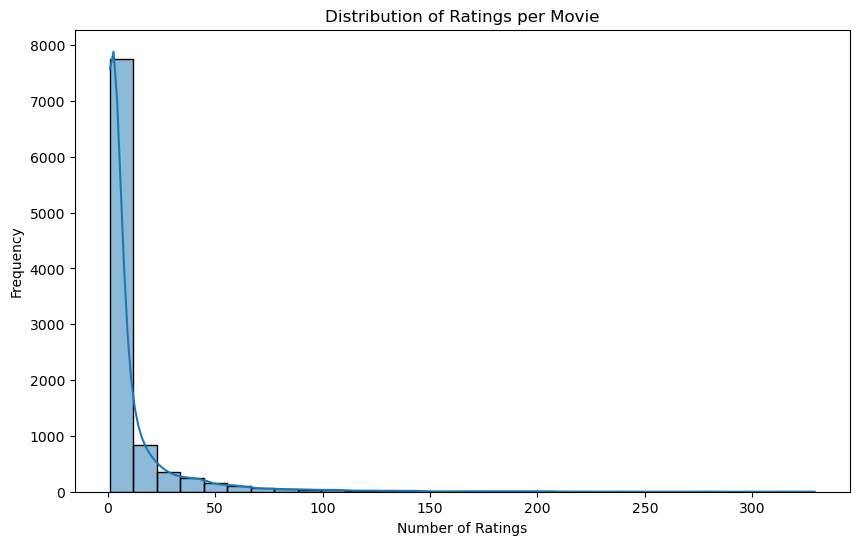

In [33]:
plt.figure(figsize=(10, 6))
ratings_per_movie = ratings.groupby('movieId').size()
sns.histplot(ratings_per_movie, bins=30, kde=True)
plt.title('Distribution of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

The distribution reveals that a significant number of movies receive very few ratings, while a small subset of movies gets a large number of ratings, suggesting that a few films are highly popular.

#### Top Movies by Average Rating

/tmp/ipykernel_52685/1290209717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_movies_df['average_rating'] = top_movies.values


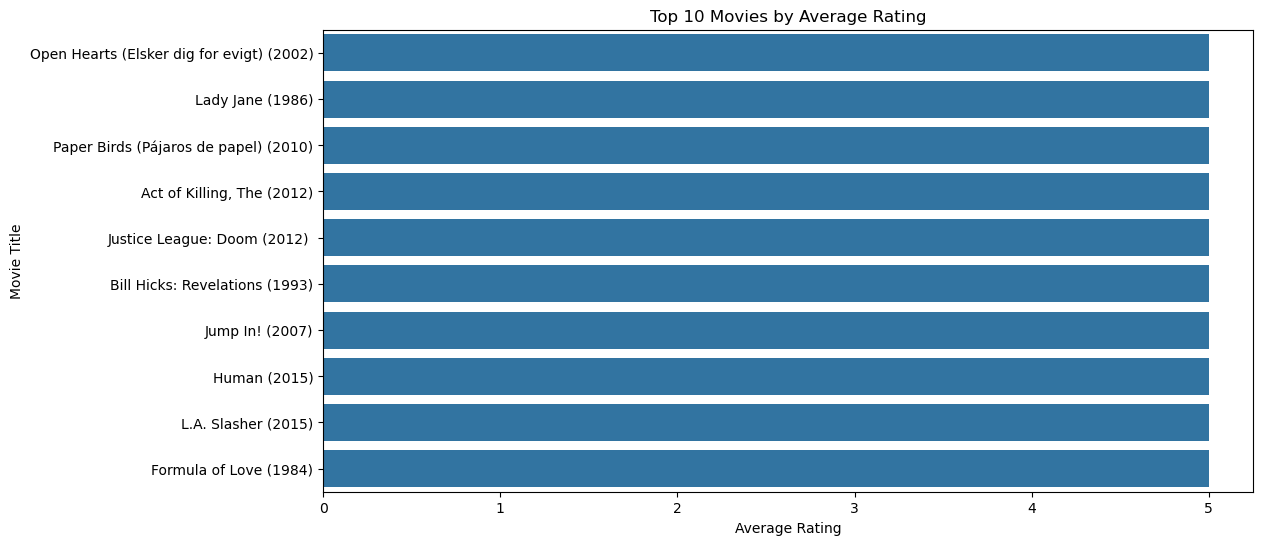

In [34]:
top_movies = ratings.groupby('movieId')['rating'].mean().sort_values(ascending=False).head(10)
top_movies_df = movies[movies['movieId'].isin(top_movies.index)]
top_movies_df['average_rating'] = top_movies.values

plt.figure(figsize=(12, 6))
sns.barplot(x='average_rating', y='title', data=top_movies_df)
plt.title('Top 10 Movies by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()

 The analysis identifies the top 10 movies with the highest average ratings, providing insights into user preferences and indicating the films that are well-received by audiences.

#### Ratings Over Time

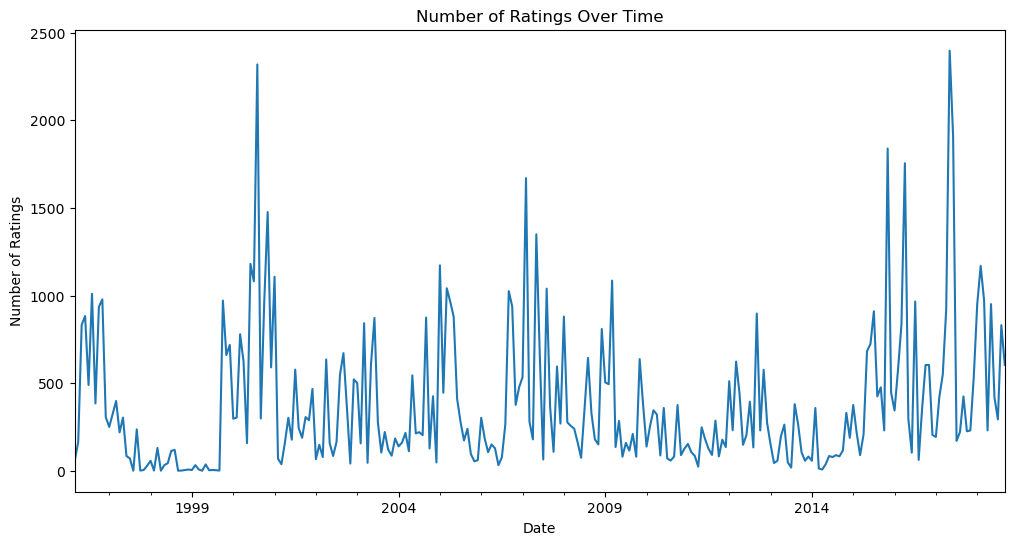

In [35]:
# Convert timestamp to datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

plt.figure(figsize=(12, 6))
ratings.set_index('timestamp').resample('M').size().plot()
plt.title('Number of Ratings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Ratings')
plt.show()

The trend shows an increase in the number of ratings over time, possibly indicating growing user engagement and the expanding user base of the movie platform.

#### Correlation Analysis

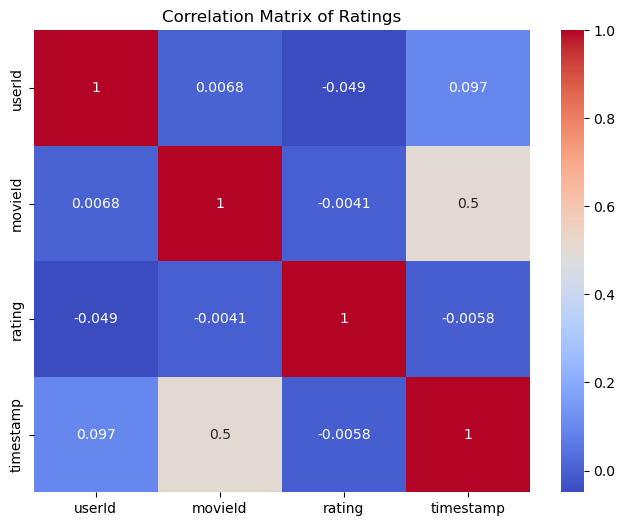

In [36]:
# Correlation matrix for numerical features
correlation_matrix = ratings.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Ratings')
plt.show()

### Dataset Overview

- **Ratings**: 100,000 ratings provided by 610 users on 9,000 movies. Each user has rated at least 20 movies, ensuring data richness.
- **Movies**: Each movie has an associated title and genre(s).
- **Tags**: Tags provided by users to describe movies, useful for content-based filtering approaches.
- **Links**: Links to IMDb and TMDb, potentially useful for extending the dataset with additional information.

### Feature Relevance

The primary data source for solving our problem is the **ratings** dataset, as it contains user preferences, which is the core input for collaborative filtering algorithms. Additional datasets, such as movies and tags, may be used for further exploration of hybrid recommendation approaches or content-based filtering.

### Descriptive Statistics

We will begin by exploring basic statistics of the dataset:
- **Number of unique users**: 610
- **Number of unique movies**: 9,000
- **Total number of ratings**: 100,000
- **Rating distribution**: Ratings range from 0.5 to 5.0, indicating user preferences.

### Suitability for the Project

This dataset is highly suitable for building a recommendation system due to:
- **Rich user-item interaction data**: The 100,000 ratings capture diverse user preferences across a large set of movies, which is essential for building accurate collaborative filtering models.
- **Relevant features**: The dataset includes user ratings, which are the primary input for recommendation models, and movie metadata for potential hybrid approaches.

### Limitations

- **Sparsity**: With many movies and relatively fewer ratings per user, the data is sparse, which can pose a challenge for collaborative filtering techniques.
- **Cold-start problem**: New users or movies without sufficient data can be difficult to recommend accurately, which is a known limitation in recommendation systems.

Despite these limitations, the dataset provides a solid foundation for developing a recommendation system that can address the business problem of personalized movie suggestions.